In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset = pd.read_csv('/home/bk/Desktop/mlai/Notes/Day 21/dataset/general_data.csv')
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
dataset.dropna(inplace=True)


In [4]:
dataset.drop(['EmployeeID','EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset['Attrition'] = le.fit_transform(dataset['Attrition'])
dataset['BusinessTravel'] = le.fit_transform(dataset['BusinessTravel'])
dataset['Department'] = le.fit_transform(dataset['Department'])
dataset['EducationField'] = le.fit_transform(dataset['EducationField'])
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['JobRole'] = le.fit_transform(dataset['JobRole'])
dataset['MaritalStatus'] = le.fit_transform(dataset['MaritalStatus'])

In [6]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [8]:
X = dataset.drop('Attrition',axis=1)
y = dataset[['Attrition']]
X.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
tree_model = tree.DecisionTreeClassifier()

In [11]:
tree_model.fit(X = X_train, y= y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
tree_model.score(X = X_test, y = y_test)

0.9965792474344356

In [13]:
rf_model = RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

In [14]:
rf_model.fit(X_train,y_train)

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
rf_model.oob_score_

0.9937232524964337

In [16]:
for feature,imp in zip(X.columns, rf_model.feature_importances_):
    print(feature,imp)

Age 0.09672039211804377
BusinessTravel 0.027739840399295033
Department 0.025726502175132386
DistanceFromHome 0.06951731936823696
Education 0.04047279256287004
EducationField 0.041202194079307225
Gender 0.01814806736970093
JobLevel 0.036955591157718244
JobRole 0.055081163745383535
MaritalStatus 0.039688170196867635
MonthlyIncome 0.09352809834888463
NumCompaniesWorked 0.056424515908831165
PercentSalaryHike 0.06537354926077839
StockOptionLevel 0.03319775095266095
TotalWorkingYears 0.08663889668264341
TrainingTimesLastYear 0.04397861789337545
YearsAtCompany 0.07193031092991495
YearsSinceLastPromotion 0.04351228616772218
YearsWithCurrManager 0.05416394068263315


In [17]:
predictors=X[['Age','MonthlyIncome','TotalWorkingYears']]
tree_model=tree.DecisionTreeClassifier(max_depth=8)
tree_model.fit(X=predictors,y=y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
with open('Dtree_attrition.dot','w')as f:
    f=tree.export_graphviz(tree_model,feature_names=['Age','MonthlyIncome','TotalWorkingYears'],out_file=f);

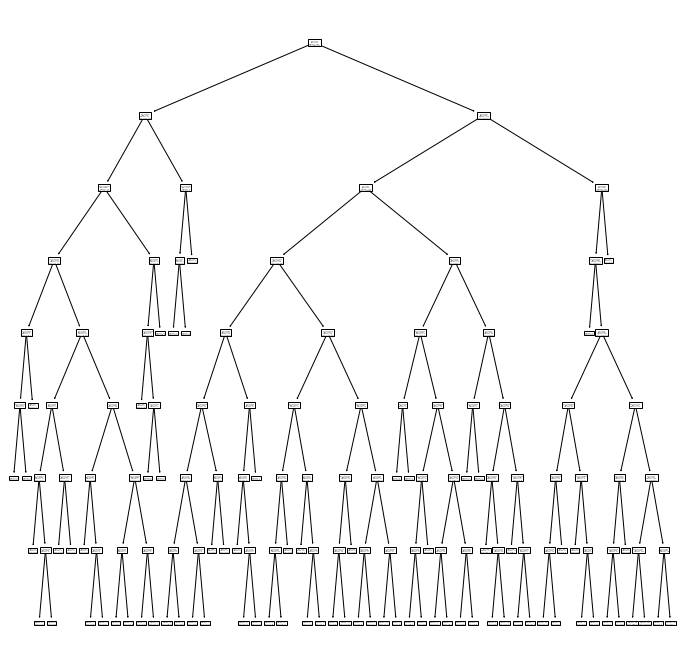

In [19]:
plt.figure(figsize=(12,12))
tree.plot_tree(tree_model)
plt.show()

# inferences/rules:

1. Employess with Age greater than 33.5 years aud total working years greater than 39 years have attrited.
2. Employess with Age greater than 33.5 years with total working years greater than 1.5 years but less than 39 years and having monthly income less than 10300 INR has attrition as YES.
3. Employess with Age greater than 33.5 years with total working years less than 1.5 years with monthly income greater than 25425 INR have not attrited.
4. Employess with Age greater than 34.5 years with total working years less than 1.5 years with monthly income less than 25425 INR have attrited.